In [1]:
import os
import json
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
models = os.listdir('evaluated')
models.sort()

In [3]:
datasets = []
names = []
hidden = []
epochs = []
sizes = []
listas = [datasets, names, hidden, epochs, sizes]

In [4]:
cosines = {}
euclidean = {}
for model in models:
    if model == '.ipynb_checkpoints':
        continue
    part = model.split('_')
    if part[0] not in datasets:
        datasets.append(part[0])
    if part[1]+'_'+part[2] not in names:
        names.append(part[1]+'_'+part[2])
    if int(part[2]) not in hidden:
        hidden.append(int(part[2]))
    if int(part[3].replace('e','')) not in epochs:
        epochs.append(int(part[3].replace('e','')))
    if int((part[4].replace('.json','')).replace('s','')) not in sizes:
        sizes.append(int((part[4].replace('.json','')).replace('s','')))
    model_path = os.path.join('evaluated',model)
    with open(model_path) as model_file:
        model_data = json.load(model_file)
        cosines[model] = model_data['cosine']
        euclidean[model] = model_data['euclidean']

In [5]:
for lista in listas:
    lista.sort()
    print(lista)

['europarl']
['NN3_850', 'NN3_900', 'NN3_950', 'NN_850', 'NN_900', 'NN_950']
[850, 900, 950]
[100]
[5000, 10000, 15000, 20000]


In [6]:
def show_plot(models,cosines,euclidean):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(models, cosines, label='Cosin Similarity')
    ax[1].plot(models, euclidean, label='Euclidean Distance')

    ax[0].set_title('Cosine Similarity')
    ax[1].set_title('Euclidean Distance')
    fig.tight_layout()
    ax[0].set_xticks(models)
    ax[1].set_xticks(models)
    ax[0].set_xticklabels(models,rotation=90)
    ax[1].set_xticklabels(models,rotation=90)
    plt.show()    

In [7]:
def show_results(s, e):
    to_print = []
    cos = []
    euc = []
    print(f'Size {str(s)} and epoch {str(e)}')
    for model in models:
        if 's'+str(s) in model and 'e'+str(e) in model:
            to_print.append(model)
            cos.append(cosines[model])
            euc.append(euclidean[model])
            norm_cos = [round(i/max(cos),3) for i in cos]
            norm_euc = [round(i/max(euc),3) for i in euc]
    show_plot(to_print, cos, euc)
    results = pd.DataFrame({"Cosine":cos, "Euclidean":euc}, #"NormCos":norm_cos, "NormEuc":norm_euc},
                           index=to_print)
    display(results)

Size 5000 and epoch 100


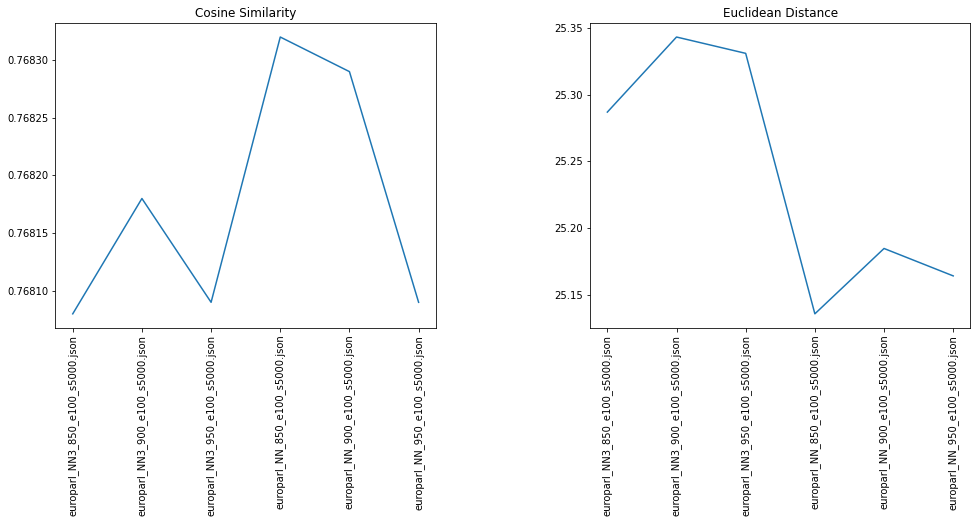

,Cosine,Euclidean
europarl_NN3_850_e100_s5000.json,0.76808,25.28700
europarl_NN3_900_e100_s5000.json,0.76818,25.34330
europarl_NN3_950_e100_s5000.json,0.76809,25.33105
europarl_NN_850_e100_s5000.json,0.76832,25.13572
europarl_NN_900_e100_s5000.json,0.76829,25.18473
europarl_NN_950_e100_s5000.json,0.76809,25.16417


In [9]:
for s in sizes:
    show_results(s,100)
    break

In [10]:
def evolution_size_epoch(models):
    meta_cos = []
    meta_euc = []
    for e in epochs:
        cos = []
        euc = []
        for s in sizes:
            sum_cos = 0
            sum_euc = 0
            count = 0
            for model in models:
                if 's'+str(s) in model and 'e'+str(e) in model:
                    count += 1
                    sum_cos += cosines[model]
                    sum_euc += euclidean[model]
            cos.append(round(sum_cos/count,3))
            euc.append(round(sum_euc/count,3))
        meta_cos.append(cos)
        meta_euc.append(euc)
    return meta_cos, meta_euc            

In [11]:
cos, euc = evolution_size_epoch(models)
cos_results = pd.DataFrame(cos, columns = sizes, index = epochs)
cos_results.style.highlight_max(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
100,0.768000,0.769000,0.769000,0.769000


In [12]:
cos_results.style.highlight_max(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
100,0.768000,0.769000,0.769000,0.769000


In [13]:
euc_results = pd.DataFrame(euc, columns = sizes, index = epochs)
euc_results.style.highlight_min(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
100,25.241000,25.184000,25.194000,25.198000


In [14]:
euc_results.style.highlight_min(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
100,25.241000,25.184000,25.194000,25.198000


In [15]:
def evolution_hidden(models):
    meta_cos = []
    meta_euc = []
    for h in hidden:
        cos = []
        euc = []
        for s in sizes:
            sum_cos = 0
            sum_euc = 0
            count = 0
            for model in models:
                if 's'+str(s) in model and '_'+str(h)+'_' in model:
                    count += 1
                    sum_cos += cosines[model]
                    sum_euc += euclidean[model]
            cos.append(round(sum_cos/count,3))
            euc.append(round(sum_euc/count,3))
        meta_cos.append(cos)
        meta_euc.append(euc)
    return meta_cos, meta_euc   

In [16]:
cos, euc = evolution_hidden(models)
cos_results = pd.DataFrame(cos, columns = sizes, index = hidden)
cos_results.style.highlight_max(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
850,0.768000,0.769000,0.769000,0.769000
900,0.768000,0.769000,0.769000,0.769000
950,0.768000,0.769000,0.769000,0.769000


In [17]:
cos_results.style.highlight_max(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
850,0.768000,0.769000,0.769000,0.769000
900,0.768000,0.769000,0.769000,0.769000
950,0.768000,0.769000,0.769000,0.769000


In [18]:
euc_results = pd.DataFrame(euc, columns = sizes, index = hidden)
euc_results.style.highlight_min(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
850,25.211000,25.180000,25.181000,25.199000
900,25.264000,25.179000,25.202000,25.206000
950,25.248000,25.193000,25.198000,25.188000


In [19]:
euc_results.style.highlight_min(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
850,25.211000,25.180000,25.181000,25.199000
900,25.264000,25.179000,25.202000,25.206000
950,25.248000,25.193000,25.198000,25.188000


In [25]:
def evolution_name(models):
    meta_cos = []
    meta_euc = []
    for n in names:
        cos = []
        euc = []
        for s in sizes:
            sum_cos = 0
            sum_euc = 0
            count = 0
            for model in models:
                if 's'+str(s) in model and n in model:
                    count += 1
                    sum_cos += cosines[model]
                    sum_euc += euclidean[model]
            cos.append(round(sum_cos/count,3))
            euc.append(round(sum_euc/count,3))
        meta_cos.append(cos)
        meta_euc.append(euc)
    return meta_cos, meta_euc   

In [26]:
cos, euc = evolution_name(models)
cos_results = pd.DataFrame(cos, columns = sizes, index = names)
cos_results.style.highlight_max(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
NN3_850,0.768000,0.769000,0.769000,0.769000
NN3_900,0.768000,0.769000,0.769000,0.769000
NN3_950,0.768000,0.769000,0.769000,0.769000
NN_850,0.768000,0.769000,0.769000,0.770000
NN_900,0.768000,0.769000,0.769000,0.770000
NN_950,0.768000,0.769000,0.769000,0.770000


In [27]:
cos_results.style.highlight_max(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
NN3_850,0.768000,0.769000,0.769000,0.769000
NN3_900,0.768000,0.769000,0.769000,0.769000
NN3_950,0.768000,0.769000,0.769000,0.769000
NN_850,0.768000,0.769000,0.769000,0.770000
NN_900,0.768000,0.769000,0.769000,0.770000
NN_950,0.768000,0.769000,0.769000,0.770000


In [29]:
euc_results = pd.DataFrame(euc, columns = sizes, index = names)
euc_results.style.highlight_min(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
NN3_850,25.287000,25.223000,25.209000,25.238000
NN3_900,25.343000,25.250000,25.257000,25.272000
NN3_950,25.331000,25.250000,25.253000,25.243000
NN_850,25.136000,25.137000,25.153000,25.159000
NN_900,25.185000,25.107000,25.147000,25.139000
NN_950,25.164000,25.136000,25.144000,25.134000


In [30]:
euc_results.style.highlight_min(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
NN3_850,25.287000,25.223000,25.209000,25.238000
NN3_900,25.343000,25.250000,25.257000,25.272000
NN3_950,25.331000,25.250000,25.253000,25.243000
NN_850,25.136000,25.137000,25.153000,25.159000
NN_900,25.185000,25.107000,25.147000,25.139000
NN_950,25.164000,25.136000,25.144000,25.134000


In [34]:
types = ["NN_","NN3"]
def evolution_type(models):
    meta_cos = []
    meta_euc = []
    for n in types:
        cos = []
        euc = []
        for s in sizes:
            sum_cos = 0
            sum_euc = 0
            count = 0
            for model in models:
                if 's'+str(s) in model and n in model:
                    count += 1
                    sum_cos += cosines[model]
                    sum_euc += euclidean[model]
            cos.append(round(sum_cos/count,3))
            euc.append(round(sum_euc/count,3))
        meta_cos.append(cos)
        meta_euc.append(euc)
    return meta_cos, meta_euc 

In [35]:
cos, euc = evolution_type(models)
cos_results = pd.DataFrame(cos, columns = sizes, index = types)
cos_results.style.highlight_max(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
NN_,0.768000,0.769000,0.769000,0.770000
NN3,0.768000,0.769000,0.769000,0.769000


In [36]:
cos_results.style.highlight_max(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
NN_,0.768000,0.769000,0.769000,0.770000
NN3,0.768000,0.769000,0.769000,0.769000


In [38]:
euc_results = pd.DataFrame(euc, columns = sizes, index = types)
euc_results.style.highlight_min(color = 'lightgreen', axis = 0)

,5000,10000,15000,20000
NN_,25.162000,25.127000,25.148000,25.144000
NN3,25.320000,25.241000,25.239000,25.251000


In [39]:
euc_results.style.highlight_min(color = 'lightgreen', axis = 1)

,5000,10000,15000,20000
NN_,25.162000,25.127000,25.148000,25.144000
NN3,25.320000,25.241000,25.239000,25.251000
